# Lab Report "Demodulation" of Group 1n (Wörner, Velez, Northe)

The source code and the binaries from this report can be found in our Github [repository](https://github.com/NortheLo/Microwave_Eng_Lab/tree/main/Lab6_Analog_Digital_Mod).

### Used imports for calculations

In [25]:
import numpy as np

Helper functions:

In [26]:
db2pow: float = lambda db: np.pow(10, (db / 10))

f2omega: float = lambda f: 2 * np.pi * f

get_c_lpf = lambda omega, R: 1 / (omega * R)


def scientific_2_str(value: float, unit: str = "Ω") -> str:
    prefixes = [
        (1e9, 'G'),
        (1e6, 'M'),
        (1e3, 'k'),
        (1, ''),
        (1e-3, 'm'),
        (1e-6, 'µ'),
        (1e-9, 'n'),
        (1e-12, 'p')
    ]

    for factor, prefix in prefixes:
        if abs(value) >= factor:
            formatted = value / factor
            return f"{formatted:.3g} {prefix}{unit}"
    return f"{value:.3g} {unit}"  # fallback for very small values

## 7.1 Analog Modulation and Demodulation

Insert Report here

### 7.1.1 Generation of an Amplitude-Modulated Signal

Insert Report here

Calculation of the C for the LPF

In [27]:
R       = 10e3  # [Ohm] 
f_c     = 1e6   # [Hz] carrier frequency
f_max   = 10e3  # [Hz] max modulation of the amplitude
m       = 0.3   # [] modulation depth

omega_c   = f2omega(f_c)
omega_max = f2omega(f_max)

lower_c = get_c_lpf(omega_c, R)
upper_c = get_c_lpf(omega_max, R) * 1 / m

print(f"Min. Capacitance: {scientific_2_str(lower_c, "F")}")
print(f"Max. Capacitance: {scientific_2_str(upper_c, "F")}")


c = 0.5 * upper_c

print(f"Final C Value: {scientific_2_str(c, "F")}")

Min. Capacitance: 15.9 pF
Max. Capacitance: 5.31 nF
Final C Value: 2.65 nF


### 7.1.2 Demodulation of an Amplitude-Modulated Signal

**Now find a suitable value for the capacitor to demodulate.**

Insert report here

**Demodulate two more signals. To do this, select any type of LF source (e.g., pulse with a defined rise and fall time → sawtooth/triangle/rectangle). Save the carrier, the LF signal and the demodulated signal in the form of a bitmap**

Insert report here

### 7.1.3 Demodulation of a Frequency-Modulated Signal

The signals have the following properties:
- $f_c = 1 \text{MHz}$ carrier frequency (Frequency)
- $f_{FM} = 200 \text{kHz}$ frequency deviation (FM deviation)
- $f_s = 10 \text{kHz}$ signal frequency (low-frequency, modulating signal, FM rate)

**What frequency do you expect (frequency of the LF signal) and what frequency do you read off? Can you explain this effect?**

Insert Report here

**How and why can the amplifier help you with this?**

Insert Report here

Now create a frequency-modulated signal with the signal generator.
**Look at it with the spectrum analyzer and identify the components of the received signal. <br>
Record this with pictures. Compare the characteristics of the measured spectrum to them of the theoretical one.**

Explanation: <br>
We can see in the spectras form below that the FM signal is modulated approx $\pm 200 \text{kHz}$ around the center frequency. Notable is that there are some peaks outside from this frequency band. <br>
For the determination of the modulation depth we created the third spectrum, where read off the carrier peak power and the power of the sideband peaks.
The result is close to the desired $m=0.3$, but not exact due to e.g. leakage effect and other effects.

In [ ]:
pow_sb = -19.69        # [dB] power sideband
pow_sb = pow_sb + 6    # 6 instead of 3dB due to voltage
pow_car = -3.22        # [dB] power carrier

sb_lin = db2pow(pow_sb / 2) # considers 20 instead 10 * log10
car = db2pow(pow_car / 2)

m = sb_lin / car

print(f"Modulation depth {m:.4f}")

Modulation depth 0.2996


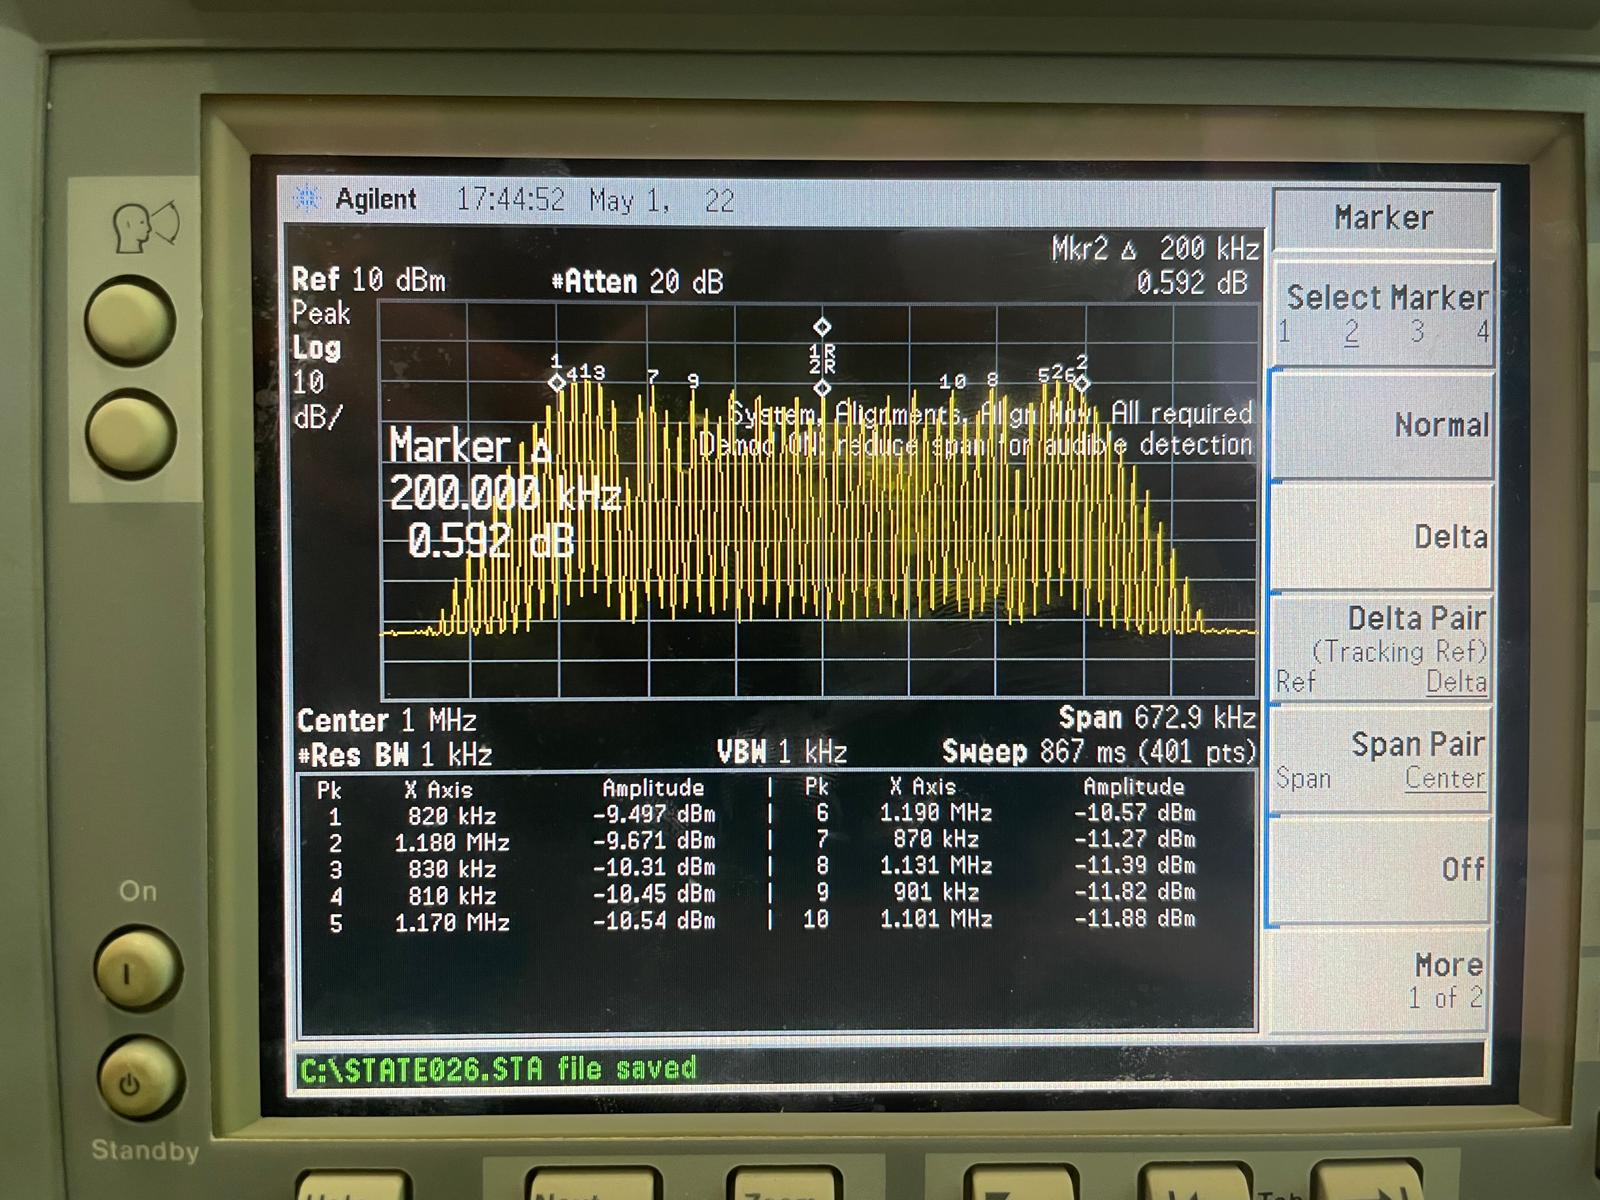 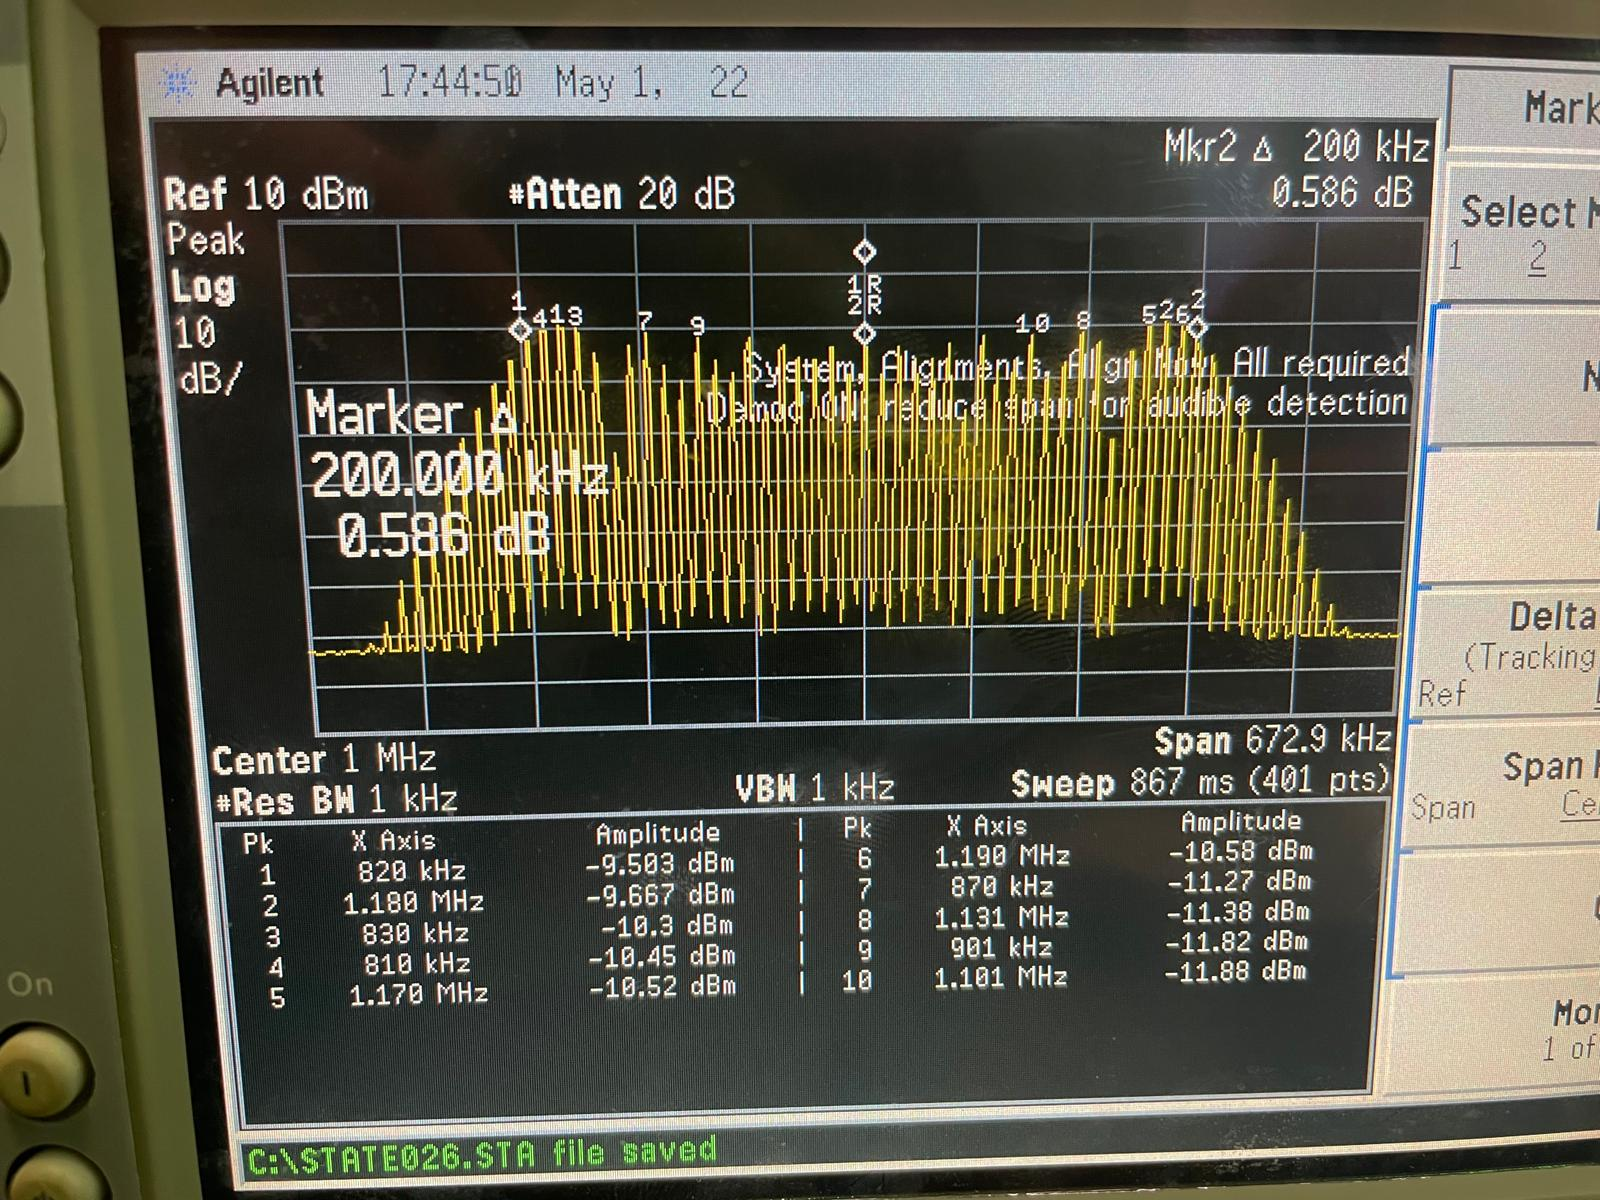 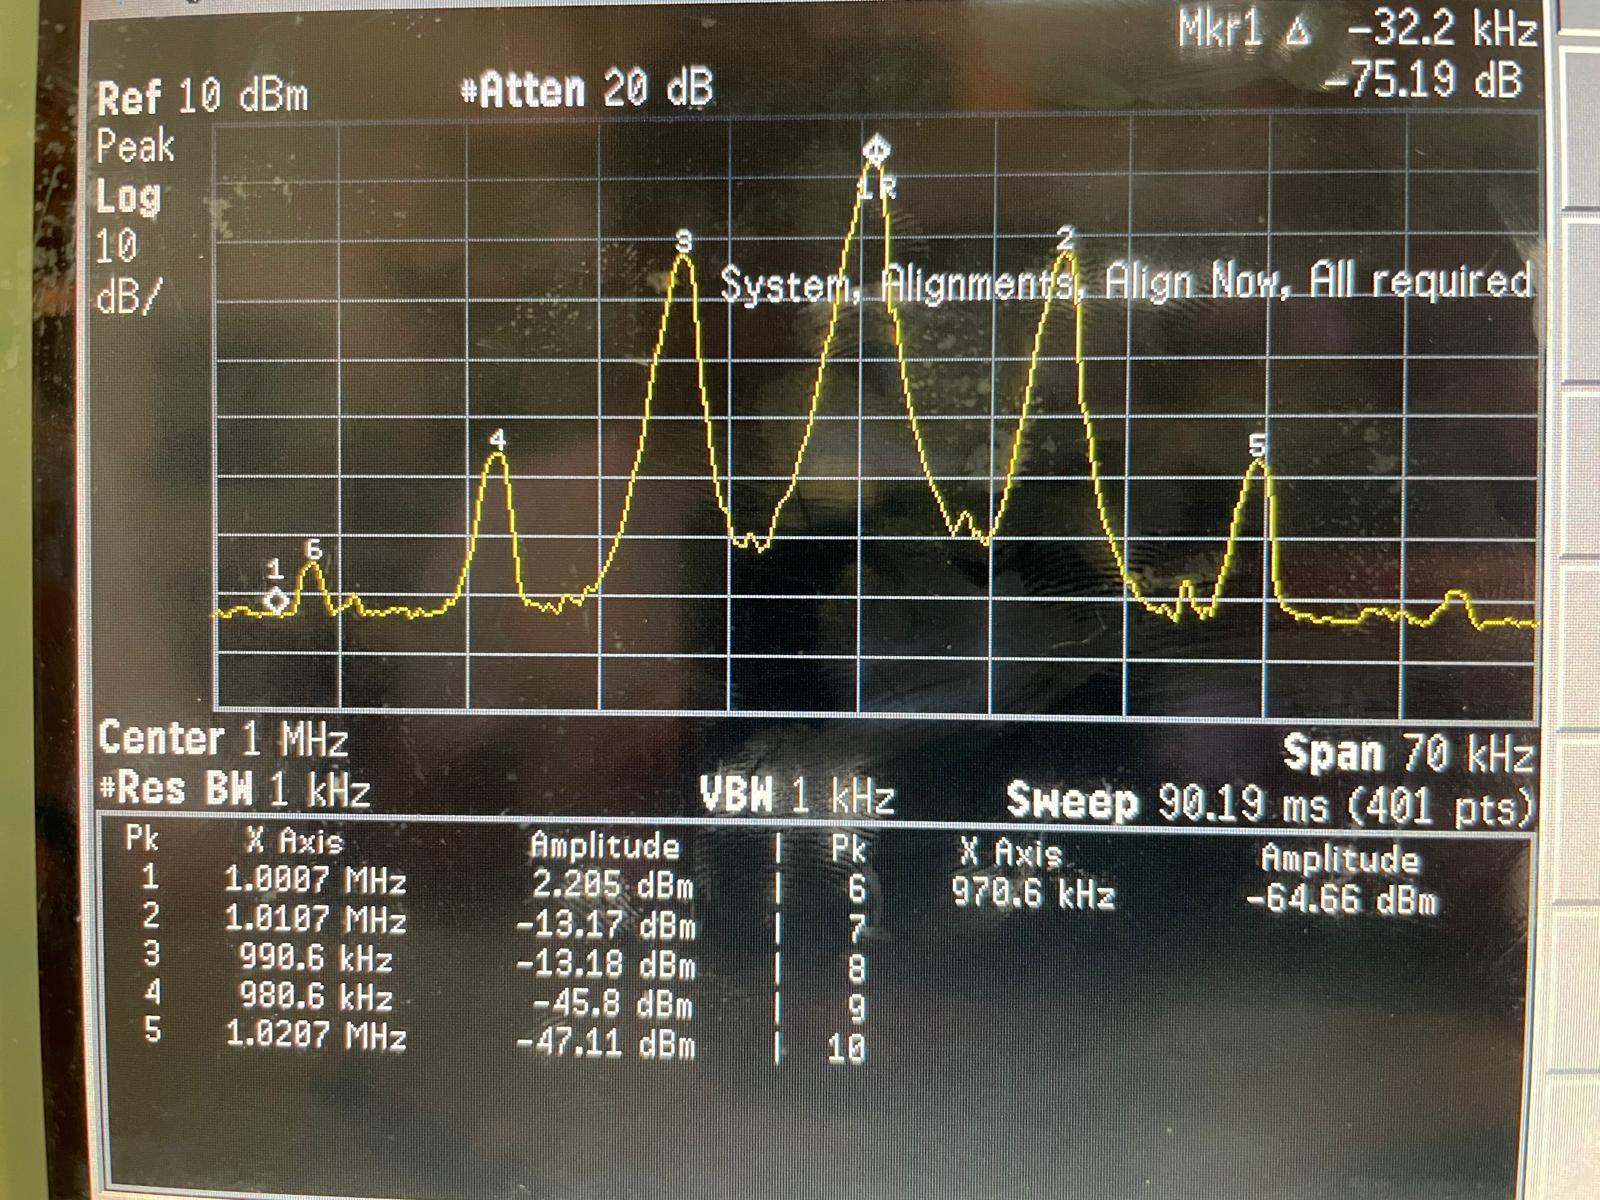

## 7.2 Digital Demodulation

The following settings were used:
- $ f_c = 800 \text{MHz} $
- $ P_{LO} = 10 \text{dBm} $ for the first signal generator (R%S in the script)
- $ P_{RF} = 0 \text{dBm}$ for the second signal generator (Agilent in the script)

**Which form of the IQ signals would you expect?**

Expectation: <br>
The expectation would be to see on each oscilloscope channel complementary binary values.

Think about how the modulated transmit
signal looks like. In addition, think about what an IQ demodulator does or how it is constructed.<br>
**Why could it be that the displayed IQ signals deviate from theory? What could help?**

IQ demodulator: <br>
- Splits signal in two
- mixes one branch (I) with the LO signal
- mixes the other (Q) with a 90° shifted signal
- Both branches get filtered to reduce alias effects

The deviation from the expectation is due to the fact that the RF signal (simulates signal from an antenna/TX) is not syncronized with the LO signal, which simulates the LO of a receiver. So the fix would be to syncronize the PLLs of our lab equipment, which can be done by hooking up the trigger of one signal generator to the other. <br>
In a constellation diagram the points would rotate equidistant around the center. 

![title](Screenshots/scope_0.png)

**Reconstruct the information signal according to (5.5) from the script (Calculate the
amplitude of the received signal. Take a photo or save a picture of the displayed signals.).**

In [29]:
s_i = 48e-3     # [V] 
s_q = 225e-3    # [V]
a = np.sqrt(np.pow(s_i, 2) + np.pow(s_q, 2))

print(f"Amplitude of the received signal {scientific_2_str(a, "V")}")

Amplitude of the received signal 230 mV


![title](Screenshots/scope_1.png)

**Explain why the I and Q signals changed after the LO frequency had been changed and
restored.**

Because the position of I and Q is only relative to each other, they can also be represented by a mirrowed or a shifted position (as in the angle towards the I and Q axis) in the constellation diagram. <br>
As shown below the amplitude is still the same.

In [30]:
s_i = 229e-3     # [V] 
s_q = 78e-3      # [V]
a = np.sqrt(np.pow(s_i, 2) + np.pow(s_q, 2))

print(f"Amplitude of the received signal {scientific_2_str(a, "V")}")

Amplitude of the received signal 242 mV


![title](Screenshots/scope_2.png)